# Пункт 1: градиентный спуск и его исследование при разных значениях константного шага

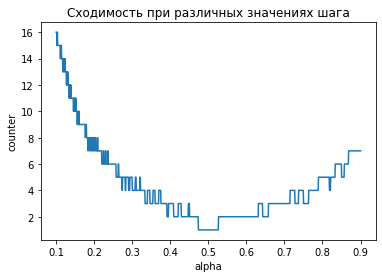

In [24]:
import numpy as np
from math import *
import matplotlib.pyplot as plt
from numpy import linalg as LA
def f(x) :
    a = x[0]
    return a**2 + 5*a + 10
def grad(x, f) :

    h = 1e-5
    y = np.arange(np.size(x))
    for i in range(np.size(x)):
        x[i] += h
        f1 = f(x)
        x[i] -= 2*h
        f2 = f(x)
        x[i] += h
        y[i] = (f1 - f2) / (2*h)
    return y

def next_x(x, alpha, f) : 
    return x - alpha(x) * grad(x, f)
def get_min(f, eps, alpha, x) :
    points = np.asarray([])
    counter = 0
    while (LA.norm(next_x(x, alpha, f) - x) > eps) :
        counter += 1
        points = np.append(points, x)
        x = next_x(x, alpha, f)
    return [x, counter, points]

# Prepare the data
x = np.linspace(0.1, 0.9, 1000)
y = np.arange(np.size(x))
for i in range(np.size(x)):
    y[i] = get_min(f, 1e-6, (lambda a: x[i]), np.asarray([7.]))[1]

# Plot the data
plt.plot(x, y, label='counter')

# Add a legend
plt.xlabel("alpha")
plt.ylabel("counter")
plt.title("Сходимость при различных значениях шага")

# Show the plot
plt.show()

# Пункт 2: градиентный спуск и его исследование при разных функциях изменения шага

In [25]:
def find_lyambda_step_function(xs):
    x = xs[0]
    if(x<0) : 
        return 0
    else :
        return 1

def find_lyambda_exponent_function(xs):
    x = xs[0]
    return pow(0.5, x)


print(get_min(f, 1e-6, (lambda a: 0.1), np.asarray([7.]))[1])

print(get_min(f, 1e-6, (lambda a: find_lyambda_step_function(x)), np.asarray([7.]))[1])

print(get_min(f, 1e-6, (lambda a: find_lyambda_exponent_function(x)), np.asarray([7.]))[1])



16
14
10


# Пункт 3: Сравнение дихотомии и градиентного спуска на его основе

# Пункт 5: анализ траектории градиентного спуска